## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [302]:
import numpy as np
import pandas as pd

In [303]:
# откроем датасет по прокатным удостоверениям
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [304]:
# откроем датасет по прокатам
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [305]:
# посмотрим информацию о первом датасете
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [306]:
# посмотрим информацию о втором датасете
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Видим, что датасеты можно объединить по столбцу puNumber. Однако, сначала нужно привести его к типу int64 в первом датасете.

In [307]:
# попробуем изменить тип столбца
try: 
    df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'])
except ValueError:
    print('В столбце есть не числовые значения')

В столбце есть не числовые значения


In [308]:
# найдём значения, в которых есть не только цифры
df_movies[~df_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
# видимо, в первом примере содержатся пробельные символы
df_movies.loc[804, 'puNumber'] = df_movies.loc[804, 'puNumber'].strip()
df_movies.loc[804, 'puNumber']

'111004112'

In [310]:
# во втором примере в нужном столбце поставим 0
df_movies.loc[1797, 'puNumber'] = '0'

In [311]:
# попробуем ещё раз
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'])

In [312]:
# удостоверимся, что всё получилось
df_movies['puNumber'].dtype

dtype('int64')

In [313]:
# выполним объединение
df_movies = df_movies.merge(df_shows, how='left')

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [314]:
# посмотрим на столбцы в получившемся датасете
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

show_start_date - этот столбец стоит привести к типу datetime  
ratings - этот столбец стоит привести к типу float64 

In [315]:
# приведём столбец show_start_date к нужному типу
df_movies['show_start_date'] = pd.to_datetime(df_movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [316]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [317]:
# попробуем изменить тип столбца ratings 
try: 
    df_movies['ratings'] = pd.to_numeric(df_movies['ratings'])
except ValueError:
    print('В столбце есть не числовые значения')

В столбце есть не числовые значения


In [318]:
# посмотрим на такие значения
df_movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Некоторые столбцы содержат знак процента. Приведём их к десятичному виду.

In [319]:
# сохраним интересующие нас значения из столбца в отдельную переменную
rating_perc = df_movies[df_movies['ratings'].str.contains('%').fillna(False)]['ratings']

In [320]:
df_movies.loc[rating_perc.index, 'ratings'] = rating_perc.str[0] + '.' + rating_perc.str[1]

In [321]:
# проверим
df_movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '9.9', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '2.8', '3.7', '1.4', '3.1',
       '9.7', '3.5', '3.2', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '9.1', '9.4', '9.0', '1.9', '1.0', '8.9', '1.3', '1.8',
       '1.2', '1.7', '9.8'], dtype=object)

In [322]:
# приведём столбец к типу float64
df_movies['ratings'] = pd.to_numeric(df_movies['ratings'])

In [323]:
df_movies['ratings'].dtype

dtype('float64')

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [324]:
# посмотрим, в каких столбцах есть пропуски
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [325]:
df_movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [326]:
(df_movies[df_movies['refundable_support'].isna()]['puNumber'] == 
 df_movies[df_movies['nonrefundable_support'].isna()]['puNumber']).unique()

array([ True])

In [327]:
(df_movies[df_movies['refundable_support'].isna()]['puNumber'] == 
 df_movies[df_movies['budget'].isna()]['puNumber']).unique()

array([ True])

In [328]:
(df_movies[df_movies['refundable_support'].isna()]['puNumber'] == 
 df_movies[df_movies['financing_source'].isna()]['puNumber']).unique()

array([ True])

Пропуски в столбцах *refundable_support*, *nonrefundable_support*, *budget* и *financing_source* находятся в одних и тех же строках.

In [329]:
df_movies[df_movies['refundable_support'].isna()]['production_country'].str.contains('Россия').sum()

1653

In [330]:
df_movies[~df_movies['refundable_support'].isna()]['production_country'].str.contains('Россия').sum()

332

Отметим, что информация по господдержке есть только для фильмов, снятых в России (частично или полностью). Однако, только для меньшей части российских фильмов есть информация о господдержке. Стоит предположить, что большинство фильмов имели другие источники финансирования.

In [331]:
df_movies['title'].nunique()

6772

Названия фильмов повторяются. Возможно, оставшиеся пропуски можно заполнить благодаря этим повторениям.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [332]:
df_movies.duplicated().sum()

0

Абсолютно идентичных строк в датасете нет.

In [333]:
# посмотрим на количество дубликатов в каждом из столбцов
for column in df_movies.columns:
    dupls = df_movies[column].duplicated().sum()
    print(f'Количество дубликатов в столбце {column}: {dupls}')

Количество дубликатов в столбце title: 714
Количество дубликатов в столбце puNumber: 2
Количество дубликатов в столбце show_start_date: 5521
Количество дубликатов в столбце type: 7478
Количество дубликатов в столбце film_studio: 1995
Количество дубликатов в столбце production_country: 6535
Количество дубликатов в столбце director: 2674
Количество дубликатов в столбце producer: 2136
Количество дубликатов в столбце age_restriction: 7481
Количество дубликатов в столбце refundable_support: 7451
Количество дубликатов в столбце nonrefundable_support: 7410
Количество дубликатов в столбце budget: 7195
Количество дубликатов в столбце financing_source: 7482
Количество дубликатов в столбце ratings: 7401
Количество дубликатов в столбце genres: 6743
Количество дубликатов в столбце box_office: 4547


In [334]:
# посмотрим на повторяющиеся значения фильмов
df_movies.pivot_table(index='title', values='puNumber', aggfunc='count').sort_values(by='puNumber', ascending=False)

,puNumber
title,
День святого Валентина_,5
"Там, где живут чудовища",4
Рапунцель: Запутанная история,4
Дом грёз,4
Белоснежка и охотник,4
...,...
Исправленному верить,1
Исполнительный лист,1
Исполнение желаний.,1


In [335]:
df_movies[df_movies.title == 'День святого Валентина_']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


In [336]:
df_movies[df_movies.title == 'Там, где живут чудовища']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3855,"Там, где живут чудовища",221044110,2010-03-29 12:00:00,Художественный,"Уорнер Бразерс Пикчерз, Легендари Пикчерз, Вил...",США-Германия,Спайк Джонз,"Том Хэнкс, Винсент Лэндэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.9,"фэнтези,драма,приключения",NaN
4717,"Там, где живут чудовища",221056610,2010-04-14 12:00:00,Художественный,"Уорнер Бразерс Пикчерз, Легендари Пикчерз, Вил...",США-Германия,Спайк Джонз,"Том Хэнкс, Винсент Лэндэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.9,"фэнтези,драма,приключения",NaN
4807,"Там, где живут чудовища",221010011,2011-01-20 12:00:00,Художественный,"Уорнер Бразерс Пикчерз, Легендари Пикчерз, Вил...",США-Германия,Спайк Джонз,"Том Хэнкс, Винсент Лэндэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.9,"фэнтези,драма,приключения",NaN
7143,"Там, где живут чудовища",121023319,2019-08-16 12:00:00,Художественный,"Уорнер Бразерс Пикчерз, Леджендари Пикчерз, Ви...","США, Германия",Спайк Джонз,"Том хэнкс, Винсент Лэндэй",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.9,"фэнтези,драма,приключения",NaN


Повторяются названия фильмов, но в таком случае они имеют разные номера прокатных удостоверений и даты начала показа. Возможно, это какая-то юридическая особенность. 

In [337]:
#посмотрим на дубли по номеру прокатного удостоверения
df_movies.puNumber.value_counts().head()

221054410    2
221154310    2
0            1
111008518    1
114002716    1
Name: puNumber, dtype: int64

In [338]:
df_movies[df_movies.puNumber == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [339]:
df_movies[df_movies.puNumber == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


В первом случае совпадает название фильмов, но разнятся, например, рейтинги. Во втором случае это два разных фильма. Избавляться от этих дубликатов не будем

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [340]:
# посмотрим на столбец type
df_movies.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [341]:
# уберём пробелы 
df_movies.type = df_movies.type.str.strip()

In [342]:
# проверим
df_movies.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [343]:
# посмотрим на столбец age_restriction
df_movies.age_restriction.unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [344]:
# посмотрим на столбец financing_source
df_movies.financing_source.unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [345]:
df_movies.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [346]:
# посмотрим на столбец production_country
df_movies.production_country.sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

In [347]:
df_movies.production_country.sort_values().nunique()

950

In [348]:
# сделаем разделителем запятую
df_movies.production_country = df_movies.production_country.str.split(' - |-|, ')

In [349]:
df_movies.production_country = df_movies.production_country.str.join(', ')

In [350]:
# уберём пробелы
df_movies.production_country = df_movies.production_country.str.strip()

In [352]:
df_movies.production_country.sort_values().nunique()

818

In [353]:
# посмотрим на столбец title 
df_movies.title.sort_values().unique()

array([' Я ПРЕПОД', '"SOS" над тайгой', '"V" значит вендетта', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], dtype=object)

In [354]:
df_movies.title.sort_values().nunique()

6772

In [355]:
# уберём пробелы
df_movies.title = df_movies.title.str.strip()

In [356]:
df_movies.title.sort_values().nunique()

6772

In [357]:
# посмотрим на столбец title 
df_movies.film_studio.sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

In [358]:
df_movies.film_studio.sort_values().nunique()

5490

In [359]:
# уберём пробелы
df_movies.film_studio = df_movies.film_studio.str.strip()

In [360]:
df_movies.film_studio.sort_values().nunique()

5462

In [361]:
# посмотрим на столбец director 
df_movies.director.sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона',
       nan], dtype=object)

In [362]:
df_movies.director.sort_values().nunique()

4811

In [363]:
# уберём пробелы
df_movies.director = df_movies.director.str.strip()

In [364]:
df_movies.director.sort_values().nunique()

4801

In [365]:
# посмотрим на столбец producer 
df_movies.producer.sort_values().unique()

array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ..., 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез', nan], dtype=object)

In [366]:
df_movies.producer.sort_values().nunique()

5349

In [367]:
# уберём пробелы
df_movies.producer = df_movies.producer.str.strip()

In [368]:
df_movies.producer.sort_values().nunique()

5334

In [369]:
# посмотрим на столбец genres 
df_movies.genres.sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

In [370]:
df_movies.genres.sort_values().nunique()

742

In [371]:
# уберём пробелы
df_movies.genres = df_movies.genres.str.strip()

In [372]:
df_movies.genres.sort_values().nunique()

742

В некоторых значениях встречаются лишние пробелы, которые создают неявные дубликаты.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [373]:
df_movies[~df_movies['budget'].isna()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,25000000.0,51850000.0,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.6
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1871,Две женщины,111013714,2014-10-02 12:00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,46502299.0,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,4731239.5
1903,Призрак_.,111001815,2015-03-02 12:00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4
1912,Ведьма .,111002215,2015-03-05 12:00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,34000000.0,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5


In [374]:
df_movies.budget.min()

0.0

In [375]:
df_movies[df_movies.budget == 0.0].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Странность заключается в том, что есть строки, в которых указана господдержка, но при этом в столбце budget стоит 0. Этот столбец можно либо заполнить, найдя медианное значение процента господдержки, и разделить на него соответствующие столбцы, либо оставить как есть. Пока оставим как есть.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [376]:
df_movies['year'] = df_movies.show_start_date.dt.year

In [377]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [378]:
def get_main(df, columns):
    for column in columns:
        new = f'main_{column}'
        df[new] = df[column].dropna().apply(lambda x: x.split(',')[0])
    return df

In [379]:
df_movies = get_main(df_movies, ('director', 'genres'))

In [380]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [381]:
df_movies['support_percent'] = round((df_movies.refundable_support + df_movies.nonrefundable_support) 
                                     / df_movies.budget, 3) * 100

In [384]:
# заполним нули в столбце budget
support_median = df_movies['support_percent'].median()

In [385]:
support_median

61.4

In [395]:
zero_index = df_movies[df_movies.budget == 0.0].index

In [396]:
df_movies.loc[zero_index, 'budget'] = (df_movies.loc[zero_index, 'nonrefundable_support'] 
                                       + df_movies.loc[zero_index, 'refundable_support']) / support_median

In [397]:
df_movies.budget.min()

97719.8697068404

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [398]:
pivot_year = df_movies.pivot_table(index='year', values='title', aggfunc='count')

In [399]:
pivot_year.columns = ['count']

In [400]:
ylimit=np.linspace(0, 1000, 11)
ylimit

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000.])

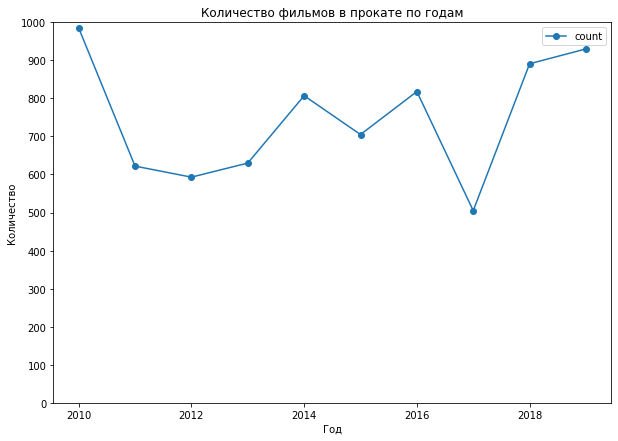

In [401]:
pivot_year.plot(title='Количество фильмов в прокате по годам', y='count', style='o-', figsize=(10, 7), 
               xlabel='Год', ylabel='Количество', ylim=(0, 1000), yticks=ylimit);

In [402]:
round(len(df_movies[~df_movies.box_office.isna()]) / len(df_movies), 2)

0.42

Информация о кассовых сборах есть для 42% фильмов.

Больше всего фильмов было в прокате в 2010 году. В 2011 году произошёл спад, на этом уровне прокат держался последующие 2 года. В 2014 году был рост, в 2015 году снова был спад, 2016 год был на уровне 2014 года. В 2017 году спад был резким и самым сильным.  В последующем году был такой же резкий рост. В 2019 году рост продолжился.

In [403]:
pivot_year_box = df_movies.pivot_table(index='year', values='box_office', aggfunc='sum')

In [404]:
pivot_year_box.columns = ['sum']

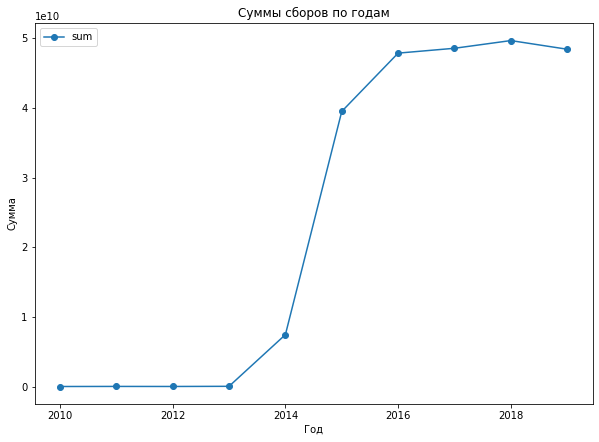

In [405]:
pivot_year_box.plot(title='Суммы сборов по годам', y='sum', style='o-', figsize=(10, 7), 
               xlabel='Год', ylabel='Сумма');

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [406]:
print(f"Минимальная сумма сборов – {pivot_year_box['sum'].idxmin()} год, максимальная – {pivot_year_box['sum'].idxmax()} год.")

Минимальная сумма сборов – 2010 год, максимальная – 2018 год.


С 2010 по 2013 годы суммы сборов не так сильно отличались, затем пошёл рост, который продолжался до 2018 года. Интересно, что сумма сборов даже в 2017 году, когда фильмов в прокате было меньше всего, всё равно была высокой. Рост начался в 2014 году. Можно предположить, что это связано с ситуацией на рынке валют и инфляцией.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [407]:
pivot_year_box = df_movies.pivot_table(index='year', values='box_office', aggfunc=['sum', 'mean', 'median', 'count'])
pivot_year_box

,sum,mean,median,count
,box_office,box_office,box_office,box_office
year,,,,
2010,2.428654e+06,2.313004e+04,1700.000,105
2011,1.410276e+07,1.293832e+05,3000.000,109
2012,6.955423e+06,5.433924e+04,5660.000,128
2013,2.979971e+07,1.619549e+05,3522.500,184
2014,7.444952e+09,2.668442e+07,18160.000,279
2015,3.949737e+10,8.494057e+07,4920933.000,465
2016,4.786630e+10,9.100057e+07,3846679.410,526
2017,4.856371e+10,1.360328e+08,9968340.000,357


In [408]:
pivot_year_box.columns = ['sum', 'mean', 'median', 'count']

На первый взгляд кажется, что суммы сборов заметно выросли, однако стоит иметь в виду, что, во-первых, не для всех фильмов есть информация по кассовым сборам, а, во-вторых, для фильмов до 2015 года данных заметно меньше, чем после. Возможно, до этого данные собирали не так аккуратно. 

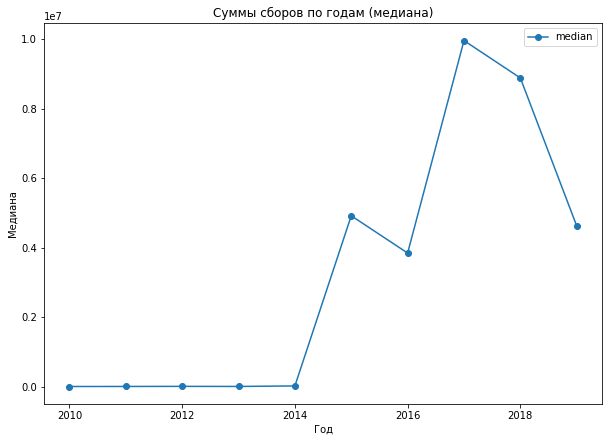

In [409]:
pivot_year_box.plot(title='Суммы сборов по годам (медиана)', y='median', style='o-', figsize=(10, 7), 
               xlabel='Год', ylabel='Медиана');

На графике видно, что медианные сборы в 2017 году были самыми высокими, несмотря на то, что в прокате было меньше всего фильмов. По всей видимости, это были самые окупающиеся фильмы.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [410]:
pivot_year_restr = df_movies[df_movies.box_office.notna()].pivot_table(index='year', 
                                                                       columns='age_restriction', values='box_office', aggfunc='sum')

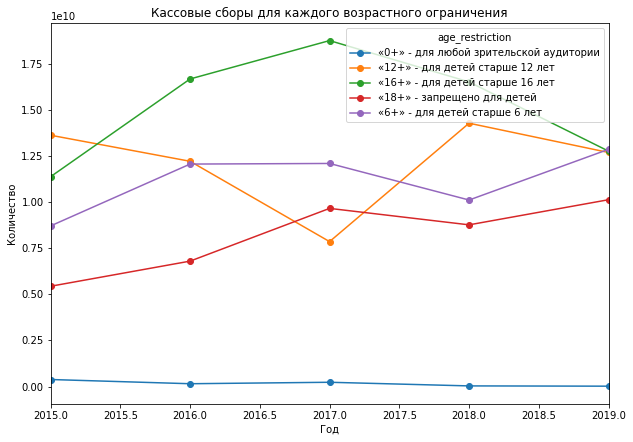

In [411]:
pivot_year_restr.plot(title='Кассовые сборы для каждого возрастного ограничения', kind='line', style='o-', figsize=(10, 7),
               xlabel='Год', ylabel='Количество', xlim=[2015, 2019]);

По всей видимости, самые прибыльные фильмы относятся к категории 16+.
На основании имеющихся данных можно сделать предварительный вывод, что фильмы категории 0+ не так прибыльны, как остальные. Скорее всего, дело в том, что их доля не так велика.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [412]:
# gs – governmental support
df_gs = df_movies[(df_movies.nonrefundable_support > 0) | (df_movies.refundable_support > 0)]

In [413]:
df_gs.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,support_percent
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,33.4
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,NaN,70.0
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,61.3
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.0
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,62.5


In [414]:
# медианный рейтинг для фильмов с господдержкой
df_gs['ratings'].median()

6.2

In [415]:
# для сравнения
df_movies[df_movies.nonrefundable_support.isna() & df_movies.refundable_support.isna()]['ratings'].median()

6.6

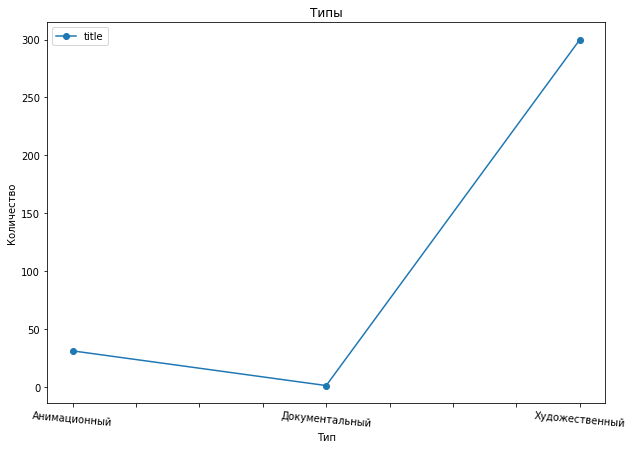

In [416]:
# посмотрим на типы
df_gs.pivot_table(index='type', values='title', 
                  aggfunc='count').plot(title='Типы', kind='line', 
                                        style='o-', figsize=(10, 7), rot=-5,
                                        xlabel='Тип', ylabel='Количество');

Большую часть составляют художественные фильмы.

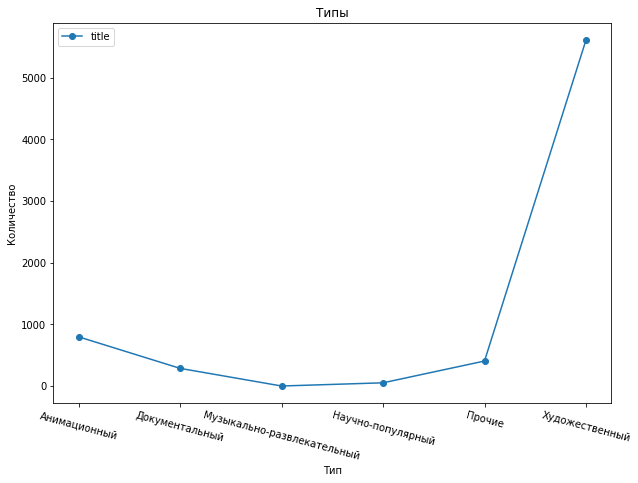

In [417]:
# для сравнения
df_movies[df_movies.nonrefundable_support.isna() & df_movies.refundable_support.isna()].pivot_table(index='type', values='title', 
                  aggfunc='count').plot(title='Типы', kind='line', 
                                        style='o-', figsize=(10, 7), rot=-15,
                                        xlabel='Тип', ylabel='Количество');

Пусть данных и немного, но пока что интересно отметить, что с господдержкой были сняты только анимационные, документальные и художественные фильмы.

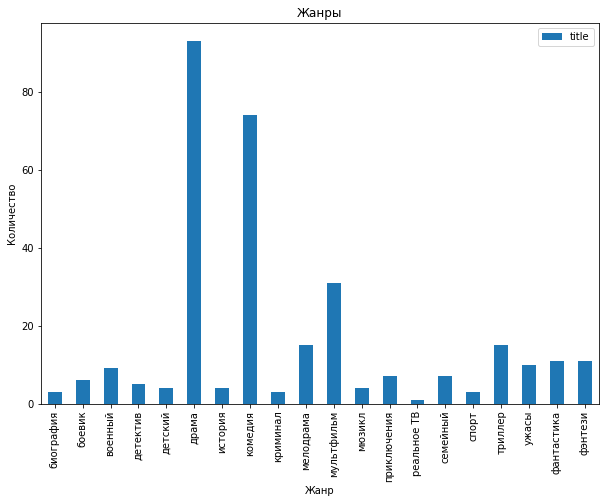

In [418]:
# посмотрим на жанры
df_gs.pivot_table(index='main_genres', values='title', 
                  aggfunc='count').plot(title='Жанры', kind='bar', 
                                        style='o-', figsize=(10, 7),
                                        xlabel='Жанр', ylabel='Количество');

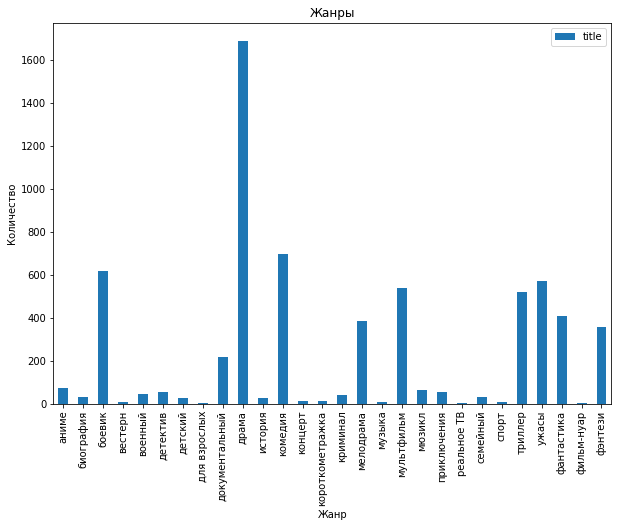

In [419]:
df_movies.pivot_table(index='main_genres', values='title', 
                  aggfunc='count').plot(title='Жанры', kind='bar', 
                                        style='o-', figsize=(10, 7),
                                        xlabel='Жанр', ylabel='Количество');

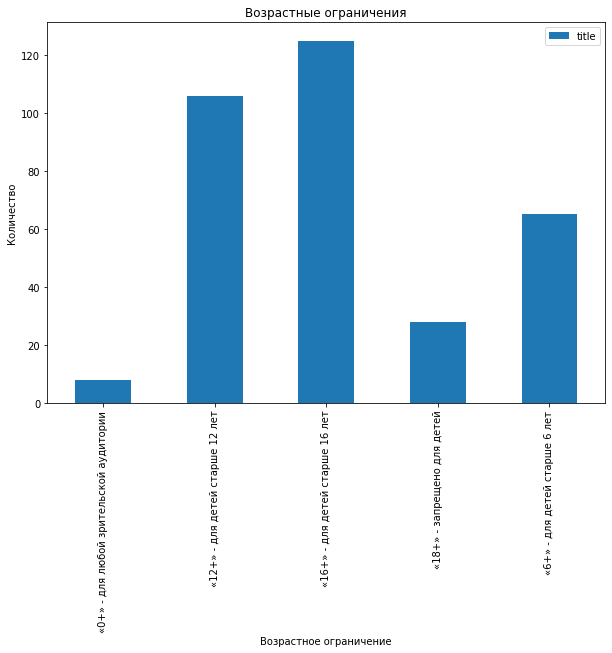

In [420]:
# посмотрим на возрастные ограничения
df_gs.pivot_table(index='age_restriction', values='title', 
                  aggfunc='count').plot(title='Возрастные ограничения', kind='bar', 
                                        style='o-', figsize=(10, 7),
                                        xlabel='Возрастное ограничение', ylabel='Количество');

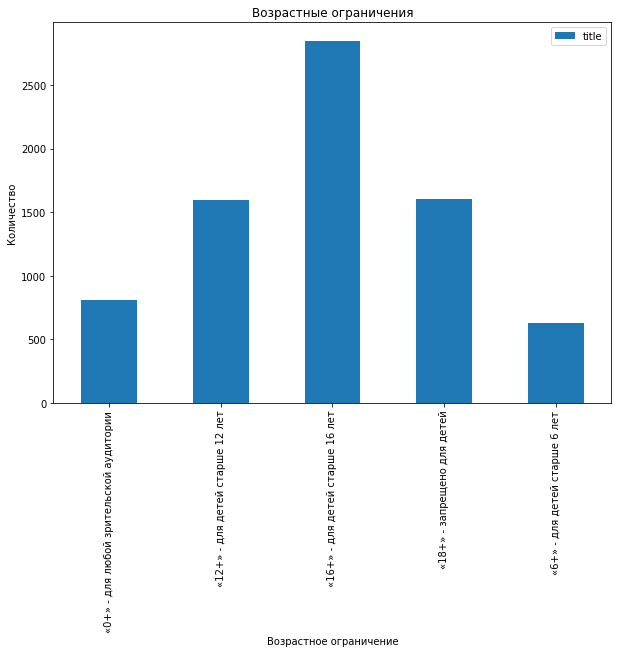

In [421]:
# для сравнения
df_movies.pivot_table(index='age_restriction', values='title', 
                  aggfunc='count').plot(title='Возрастные ограничения', kind='bar', 
                                        style='o-', figsize=(10, 7),
                                        xlabel='Возрастное ограничение', ylabel='Количество');

Драма оказывается лидирующим жанром. С большим отрывом за ней следует комедия.

In [422]:
df_gs['is_profit'] = df_gs.box_office > df_gs.nonrefundable_support + df_gs.refundable_support

/tmp/ipykernel_31/3236309709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gs['is_profit'] = df_gs.box_office > df_gs.nonrefundable_support + df_gs.refundable_support


In [423]:
df_gs.pivot_table(index='is_profit', values='title', aggfunc='count')

,title
is_profit,
False,214
True,118


Если рассчитывать окупаемость по минимуму (как сумму объёмов возвратной и невозвратной господдержки), то, по имеющимся данным, порядка 60% фильмов не окупились. 

In [424]:
# посмотрим на режиссёров
gs_directors = df_gs.pivot_table(index='main_director', values='title', 
                  aggfunc='count')

In [425]:
gs_directors.value_counts()

title
1        222
2         38
3          7
4          2
5          1
dtype: int64

In [426]:
gs_directors[gs_directors.title == 5]

,title
main_director,
Р.Давлетьяров,5


Больше всего фильмов в этой категории снял Ренат Давлетьяров.

In [427]:
gs_studio = df_gs.pivot_table(index='film_studio', values='title', 
                  aggfunc='count')


In [428]:
gs_studio.value_counts()

title
1        216
2         27
3          7
4          4
7          2
5          1
6          1
dtype: int64

In [429]:
gs_studio.columns = ['title']

In [430]:
gs_studio[gs_studio.title == 6]

,title
film_studio,
"ООО ""Кинокомпания ""СТВ""",6


Больше всего фильмов в этой категории сняла "Кинокомпания "СТВ".

### Шаг 5. Напишите общий вывод

В наборе данных, посвящённом рынку российского кинопроката, были устранены неявные дубликаты, исправлены типы данных в некоторых столбцах и добавлены новые столбцы. Было установлено, что меньше всего фильмов было выпущено в 2017 году. Информация о кассовых сборах имелась только для 42% фильмов. По имеющимся данным, минимальная сумма сборов была в 2010 году, максимальная – в 2018 году, однако стоит иметь в виду, что для фильмов до 2015 года данных заметно меньше, чем после. Самые прибыльные фильмы относятся к категории 16+. Возможно, потому, что охватывают наиболее активную аудиторию. На основании имеющихся данных можно сделать предварительный вывод, что фильмы категории 0+ не так прибыльны, как остальные. Скорее всего, дело в том, что их доля не так велика.  
Отдельно были проанализированы фильмы, получившие государственную поддержку. Следующие выводы приводятся с оговоркой на то, что исследуемый датасет был совсем не большим: медианный рейтинг таких фильмов составил 6.2 (дл сравнения у фильмов без господдержки – 6.6), с господдержкой были сняты только анимационные, документальные и художественные фильмы (самый популярный тип – художественный, как и в случае с фильмами без господдержки), в обоих случаях драма оказывается лидирующим жанром, а с некоторым отрывом за ней следует комедия. самыми популярной возрастной категорией в обоих случаях оказывается 16+. Режиссёр с наибольшим количеством фильмов в этой категории – Р. Давлетьяров, киностудия – "Кинокомпания "СТВ". Если рассчитывать окупаемость по минимуму (как сумму объёмов возвратной и невозвратной господдержки), то, на основании имеющихся данных, можно сделать вывод, что порядка 60% фильмов не окупились.